In [1]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])

api_dir = str(curr_dir)
if api_dir not in sys.path:
    sys.path.insert(0, api_dir)

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from src.model.classifier import Classifier
from src.xbox2_specific.datasets.XBOX2_trend_all_bd_20ms import XBOX2TrendAllBD20msSelect
from src.utils.dataset_creator import load_dataset

2021-11-09 17:01:38.906967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-09 17:01:38.906981: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Train model on data
Before using explainable AI we need to have a trained model.
To get more insight in this step see the `modeling_example` notebook.

In [2]:
#Load data
train_runs = [2, 4, 5, 6, 8, 9]
valid_runs = [1, 7]
test_runs = [3]

path_to_data = Path("/eos/project/m/ml-for-alarm-system/private/CLIC_data_transfert/Xbox2_hdf_new2/")

train, valid, test = load_dataset(creator=XBOX2TrendAllBD20msSelect(),
                                  data_path=path_to_data,
                                  manual_split=(train_runs, valid_runs, test_runs),
                                  manual_scale=[1, 2, 3, 4, 5, 6, 7, 8, 9])

2021-11-09 17:06:53.494244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-09 17:06:53.522608: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-09 17:06:53.536370: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hsb-cern): /proc/driver/nvidia/version does not exist
2021-11-09 17:06:53.910605: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


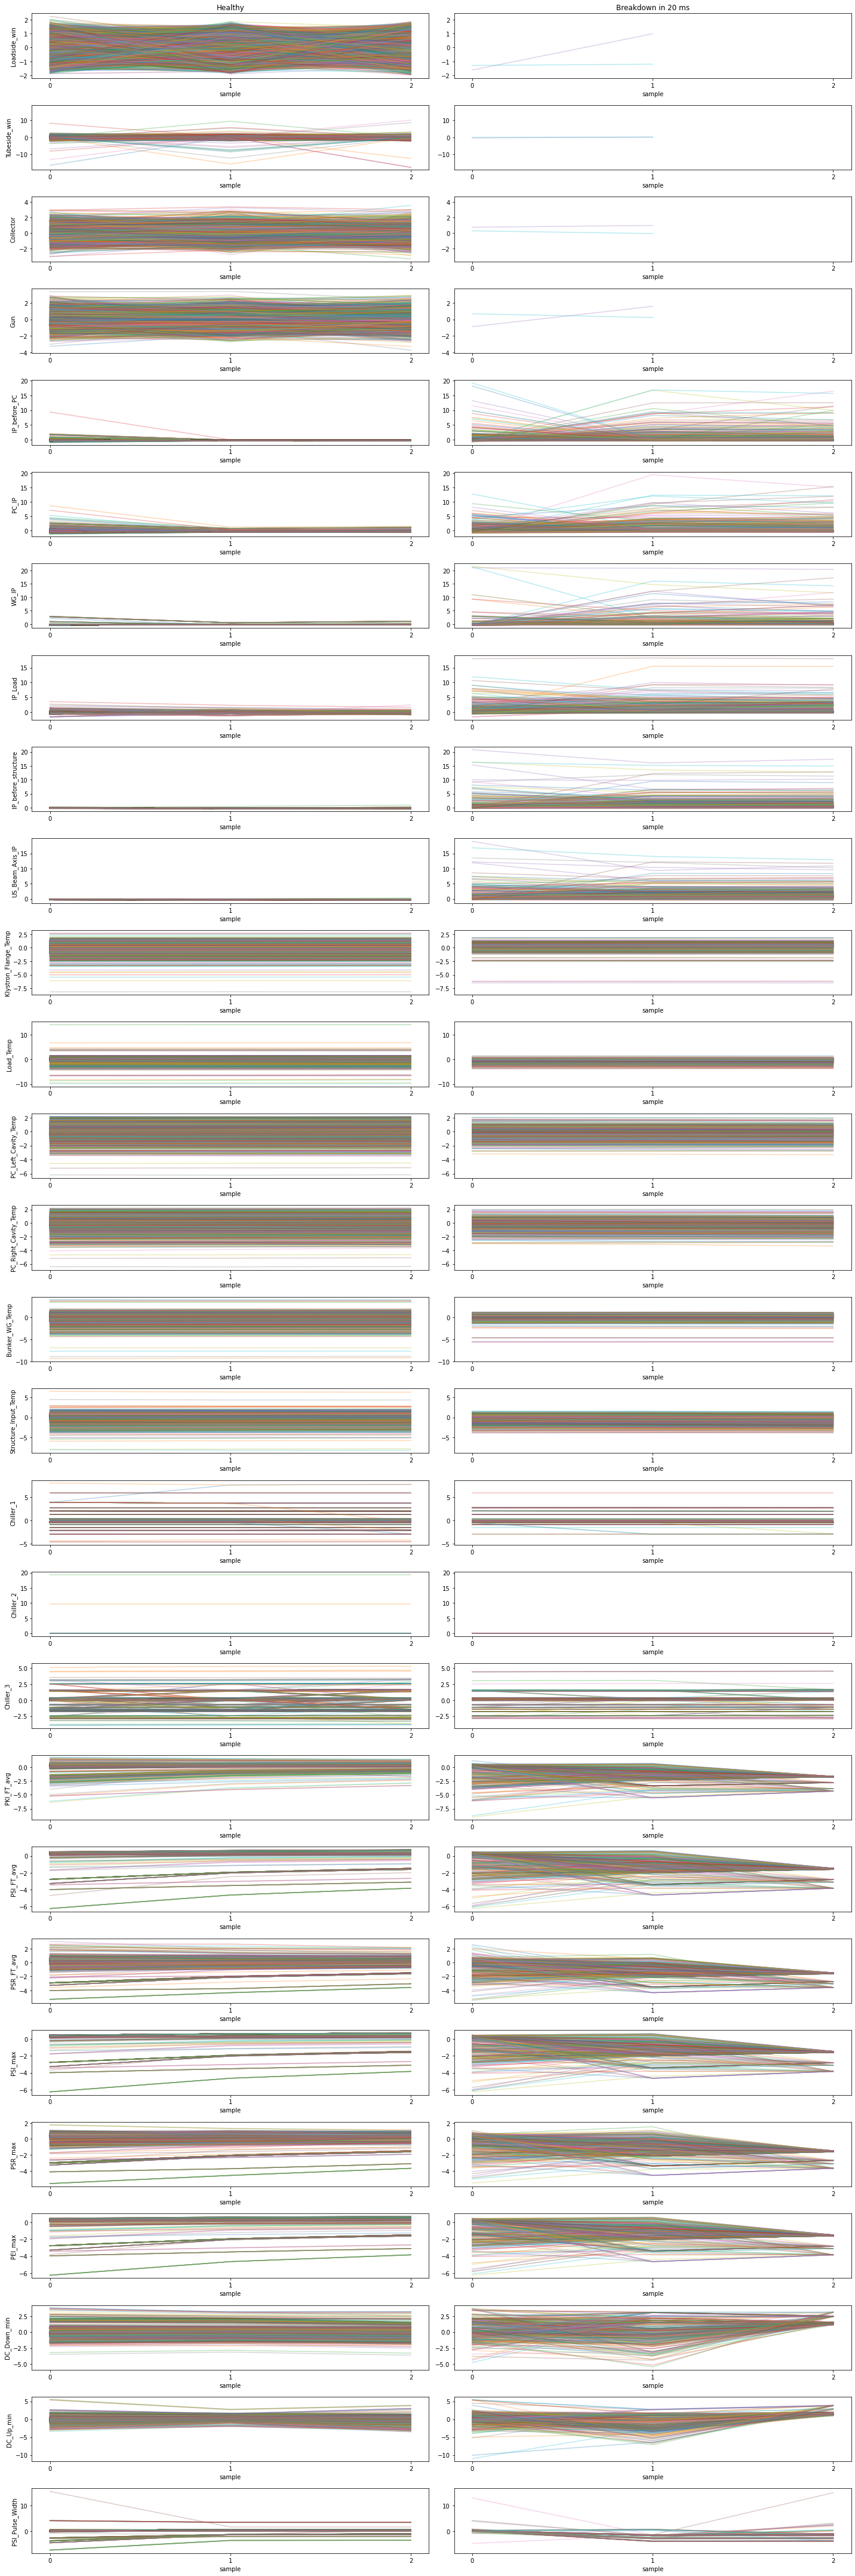

In [3]:
# Plot Dataset
n_features = len(train.X.feature)

fig, ax = plt.subplots(n_features,2, figsize=(20,60))
for i in range(n_features):
    ax[i, 0].plot(train.X[train.y.argmax(axis=1) == 0][:,:,i].values.T, alpha=0.3)
    ax[i, 0].set_xlabel("sample")
    ax[i, 0].set_ylabel(train.X.feature[i].values)
    ax[i, 0].set_xticks([0, 1, 2])
    ax[i, 1].plot(train.X[train.y.argmax(axis=1) == 1][:,:,i].values.T, alpha=0.3)
    ax[i, 1].set_xlabel("sample")
    ax[i, 1].set_xticks([0, 1, 2])
    bottom0, top0 = ax[i, 0].set_ylim()
    bottom1, top1 = ax[i, 1].set_ylim()
    ax[i, 0].set_ylim([min([bottom0, bottom1]), max([top0, top1])])
    ax[i, 1].set_ylim([min([bottom0, bottom1]), max([top0, top1])])

ax[0, 0].set_title("Healthy")
ax[0, 1].set_title("Breakdown in 20 ms")
fig.tight_layout()
plt.show()

In [4]:
# Getting data ready for machine learning
from src.utils.dataset_creator import da_to_numpy_for_ml
train_numpy, valid_numpy, test_numpy = da_to_numpy_for_ml(train, valid, test)

In [5]:
# Load hyperparameters into dictionary
hp_file = open(Path(api_dir) / "src/model/default_hyperparameters.json")
hp_dict = json.load(hp_file)

# Create model
clf = Classifier(input_shape=train_numpy.X.shape, output_directory=Path(api_dir) / "src/output", **hp_dict)

In [6]:
# Fit model to training set and validate on validation set
clf.fit_classifier(train_numpy, valid_numpy)
# load weights from an already trained model
# clf.model.load_weights(Path(api_dir) / "src/model/trained_models/trend_all_bd_20ms.hdf5")


2021-11-09 17:29:18.807871: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
139/139 [==============================] - 6s 7ms/step - loss: 0.0486 - tp: 2159.0000 - fp: 59.0000 - tn: 2159.0000 - fn: 59.0000 - accuracy: 0.9734 - precision: 0.9734 - recall: 0.9734 - auc: 0.9970 - prc: 0.9965 - val_loss: 0.7367 - val_tp: 551.0000 - val_fp: 50.0000 - val_tn: 551.0000 - val_fn: 50.0000 - val_accuracy: 0.9168 - val_precision: 0.9168 - val_recall: 0.9168 - val_auc: 0.9410 - val_prc: 0.9254
Epoch 2/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0142 - tp: 2209.0000 - fp: 9.0000 - tn: 2209.0000 - fn: 9.0000 - accuracy: 0.9959 - precision: 0.9959 - recall: 0.9959 - auc: 0.9991 - prc: 0.9988 - val_loss: 0.0732 - val_tp: 598.0000 - val_fp: 3.0000 - val_tn: 598.0000 - val_fn: 3.0000 - val_accuracy: 0.9950 - val_precision: 0.9950 - val_recall: 0.9950 - val_auc: 0.9983 - val_prc: 0.9977
Epoch 3/500
139/139 [==============================] - 0s 3ms/step - loss: 4.6200e-04 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accu

139/139 [==============================] - 0s 3ms/step - loss: 2.0548e-06 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1348 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9981 - val_prc: 0.9976
Epoch 21/500
139/139 [==============================] - 0s 3ms/step - loss: 1.7683e-06 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1364 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9981 - val_prc: 0.9976
Epoch 22/500
139/139 [==============================] - 0s 3ms/step - loss: 1.5466e-06 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e

Epoch 39/500
139/139 [==============================] - 0s 3ms/step - loss: 2.3050e-07 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1617 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9948 - val_prc: 0.9933
Epoch 40/500
139/139 [==============================] - 0s 3ms/step - loss: 2.0897e-07 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1628 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9948 - val_prc: 0.9933
Epoch 41/500
139/139 [==============================] - 0s 3ms/step - loss: 1.9047e-07 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 

Epoch 58/500
139/139 [==============================] - 0s 3ms/step - loss: 4.1566e-08 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1844 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9948 - val_prc: 0.9932
Epoch 59/500
139/139 [==============================] - 0s 3ms/step - loss: 3.9523e-08 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1853 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9948 - val_prc: 0.9932
Epoch 60/500
139/139 [==============================] - 0s 3ms/step - loss: 3.7682e-08 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 

Epoch 77/500
139/139 [==============================] - 0s 3ms/step - loss: 1.4377e-08 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1995 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9899 - val_prc: 0.9868
Epoch 78/500
139/139 [==============================] - 0s 3ms/step - loss: 1.3536e-08 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2003 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9899 - val_prc: 0.9868
Epoch 79/500
139/139 [==============================] - 0s 3ms/step - loss: 1.2600e-08 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 

Epoch 96/500
139/139 [==============================] - 0s 3ms/step - loss: 4.0330e-09 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2166 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9899 - val_prc: 0.9869
Epoch 97/500
139/139 [==============================] - 0s 3ms/step - loss: 3.7670e-09 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2172 - val_tp: 594.0000 - val_fp: 7.0000 - val_tn: 594.0000 - val_fn: 7.0000 - val_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884 - val_auc: 0.9899 - val_prc: 0.9869
Epoch 98/500
139/139 [==============================] - 0s 3ms/step - loss: 3.5010e-09 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 

Epoch 115/500
139/139 [==============================] - 0s 3ms/step - loss: 1.2982e-09 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2272 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9899 - val_prc: 0.9869
Epoch 116/500
139/139 [==============================] - 0s 3ms/step - loss: 1.2982e-09 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2278 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9899 - val_prc: 0.9869
Epoch 117/500
139/139 [==============================] - 0s 3ms/step - loss: 1.2982e-09 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 134/500
139/139 [==============================] - 0s 3ms/step - loss: 7.3425e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2370 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9883 - val_prc: 0.9847
Epoch 135/500
139/139 [==============================] - 0s 3ms/step - loss: 7.3425e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2376 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9883 - val_prc: 0.9847
Epoch 136/500
139/139 [==============================] - 0s 3ms/step - loss: 5.3205e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 153/500
139/139 [==============================] - 0s 3ms/step - loss: 3.2984e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2432 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9883 - val_prc: 0.9847
Epoch 154/500
139/139 [==============================] - 0s 3ms/step - loss: 3.2984e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2435 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9883 - val_prc: 0.9847
Epoch 155/500
139/139 [==============================] - 0s 3ms/step - loss: 3.2984e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 172/500
139/139 [==============================] - 0s 3ms/step - loss: 2.0221e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2486 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 173/500
139/139 [==============================] - 0s 3ms/step - loss: 1.7030e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2490 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 174/500
139/139 [==============================] - 0s 3ms/step - loss: 1.7030e-10 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 191/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2531 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 192/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2532 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 193/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 210/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2554 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 211/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2555 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 212/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 229/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2571 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 230/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2572 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 231/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 248/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2584 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 249/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2585 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 250/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 267/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2596 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 268/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2597 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 269/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 286/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2607 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 287/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2607 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 288/500
139/139 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 305/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2616 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 306/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2616 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 307/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 324/500
139/139 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2625 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 325/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2625 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 326/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 343/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2632 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 344/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2632 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 345/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 362/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2639 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 363/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2639 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 364/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 381/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2645 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 382/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2645 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 383/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 400/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2652 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 401/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2652 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 402/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 419/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2657 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 420/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2658 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 421/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 438/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2663 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 439/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2663 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 440/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 457/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2668 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 458/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2668 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 459/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 476/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2673 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 477/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2673 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 478/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

Epoch 495/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2677 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 496/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.2678 - val_tp: 593.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 8.0000 - val_accuracy: 0.9867 - val_precision: 0.9867 - val_recall: 0.9867 - val_auc: 0.9882 - val_prc: 0.9847
Epoch 497/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - tp: 2218.0000 - fp: 0.0000e+00 - tn: 2218.00

## Evaluate Model
To evaluate the performance of the model, the `evaluate` method can be used.

In [7]:
# eval classifier
results = clf.model.evaluate(x=test_numpy.X, y=test_numpy.y, return_dict=True)
pd.DataFrame.from_dict(results, orient='index').T

20/20 [==============================] - 0s 2ms/step - loss: 0.2655 - tp: 620.0000 - fp: 4.0000 - tn: 620.0000 - fn: 4.0000 - accuracy: 0.9936 - precision: 0.9936 - recall: 0.9936 - auc: 0.9936 - prc: 0.9916      


,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,prc
0,0.265462,620.0,4.0,620.0,4.0,0.99359,0.99359,0.99359,0.993579,0.991635


# Explanation
After training the model we now wish to explain the predictions of the model.
This can be done using explainers such as the SHAP gradient explainer.

## Make prediction
To explain a prediction we first make predictions on the test set

In [8]:
y_pred = clf.model.predict(x=test_numpy.X)

We then use `explain_samples` to explain the samples here using the SHAP graident explainer.

In [9]:
from src.model.explainer import explain_samples
from src.model.sample_explainers.gradient_shap import ShapGradientExplainer

is_correct_classification = (y_pred.argmax(axis=1) == test_numpy.y.argmax(axis=1))
ex_classification = explain_samples(explainer=ShapGradientExplainer(),
                                    model=clf.model,
                                    X_reference=train_numpy.X,
                                    X_to_explain=test_numpy.X[is_correct_classification, :, :])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [37]:
np.mean(np.mean(ex_classification[0], axis=0), axis=0).shape

(28,)

## Visualization of explanations
In order to present the sample explanation we can make a plot of the signal with a coloured overlay.
The overlay color is determined by the shap value.

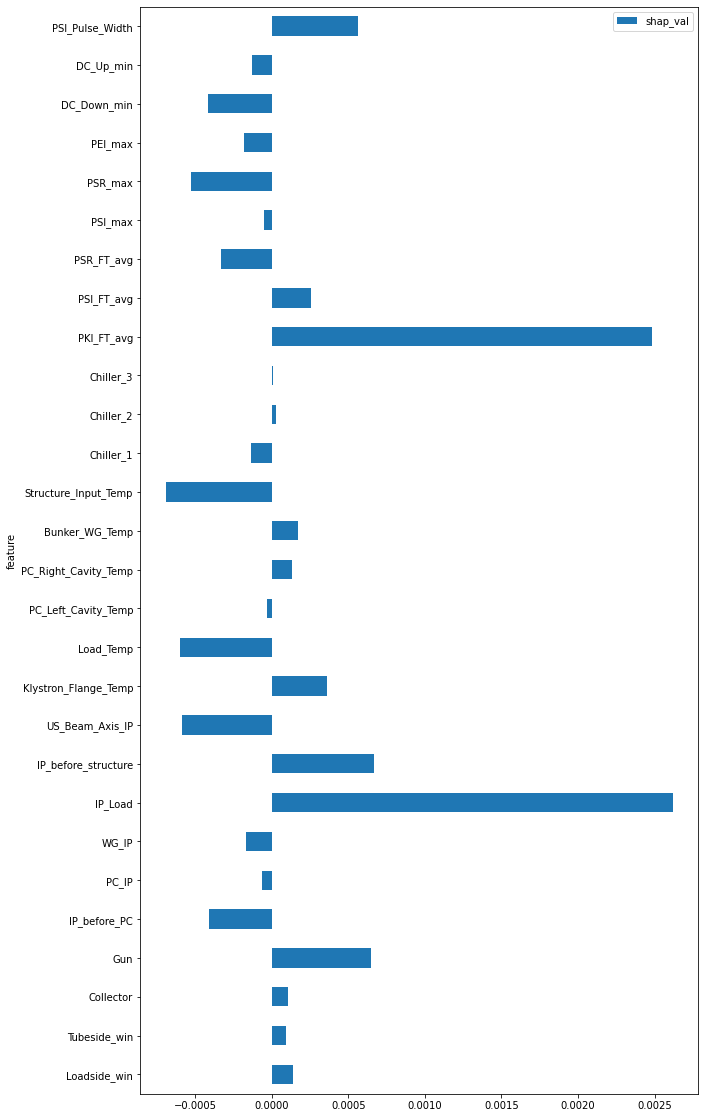

In [42]:
import numpy as np
import pandas as pd
ex_global = np.mean(np.mean(ex_classification[0], axis=0), axis=0)
df = pd.DataFrame({'feature': test.X.feature.values, 'shap_val': ex_global})
ax = df.plot.barh(x='feature', y='shap_val', figsize=(10,20))

In [ ]:
def plot_importance(X_to_explain, y_pred, explanation):
    cmap = mpl.colors.LinearSegmentedColormap.from_list('shap', [mpl.cm.cool(0), (1, 1, 1, 1), mpl.cm.cool(256)],N=256)

    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(X_to_explain[(y_pred.argmax(axis=1) == 0), :, :].mean(axis=0), linewidth=3, c="b")
    ax.plot(X_to_explain[(y_pred.argmax(axis=1) == 1), :, :].mean(axis=0), linewidth=3, c="r")

    extent = [0, len(X_to_explain[0]), ax.get_ylim()[0], ax.get_ylim()[1]]
    im1 = ax.imshow(explanation[0].mean(axis=0).T, cmap=cmap, aspect="auto", alpha=0.8, extent=extent)
    cbar1 = fig.colorbar(im1, ax=ax)
    cbar1.set_label("SHAP values (relative)")

    ax.set_xlabel("samples")
    ax.set_xlabel("amplitude")
    ax.set_title("Explanations of Classifications")
    ax.legend(["Mean normal","Mean ischemia"])